In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance=pd.read_csv("new_insurance_data.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [4]:
insurance.shape

(1338, 13)

# 1. Handling missing Values

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
col=list(insurance.columns)

In [7]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [8]:
insurance.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [9]:
for col_name in col:
        if insurance[col_name].dtypes=='object':
            insurance[col_name]=insurance[col_name].fillna(insurance[col_name].mode()[0])
        else:
             insurance[col_name]=insurance[col_name].fillna(insurance[col_name].mean())
      

In [10]:
insurance.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [11]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [12]:
insurance.head(20)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.000000,male,23.210000,0.0,no,29087.543130,17.000000,715428.00000,4.720921e+06,0.000000,5.578497e+07,southeast,1121.8739
1,18.000000,male,30.140000,0.0,no,39053.674370,7.000000,699157.00000,4.329832e+06,0.000000,1.370089e+07,southeast,1131.5066
2,18.000000,male,33.330000,0.0,no,39023.627590,19.000000,702341.00000,6.884861e+06,0.000000,7.352311e+07,southeast,1135.9407
3,18.000000,male,33.660000,0.0,no,28185.393320,11.000000,700250.00000,4.274774e+06,0.000000,7.581968e+07,southeast,1136.3994
4,18.000000,male,34.100000,0.0,no,14697.859410,16.000000,711584.00000,3.787294e+06,0.000000,2.301232e+07,southeast,1137.0110
5,18.000000,male,34.430000,0.0,no,26488.339120,20.000000,717162.00000,3.696161e+06,0.000000,3.696849e+08,southeast,1137.4697
6,18.000000,male,37.290000,0.0,no,33217.365480,13.000000,699159.00000,8.765292e+05,0.000000,6.906067e+07,southeast,1141.4451
7,18.000000,male,41.140000,0.0,no,46770.585330,12.000000,706423.00000,4.486741e+06,0.000000,9.719378e+07,southeast,1146.7966
8,18.000000,male,43.010000,0.0,no,9715.650411,17.000000,910004.69588,9.216440e+06,0.000000,5.888197e+07,southeast,1149.3959
9,18.000000,male,53.130000,0.0,no,17046.585150,19.000000,704425.00000,1.458972e+06,0.000000,9.426182e+07,southeast,1163.4627


# 2. Handling Outliers

In [13]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

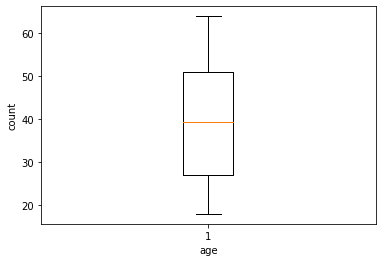

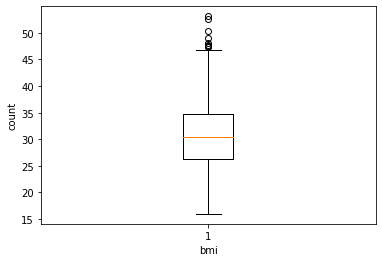

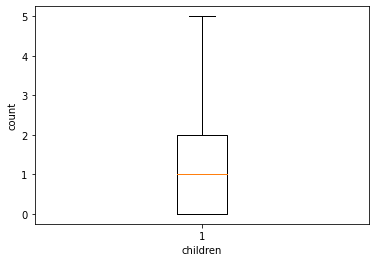

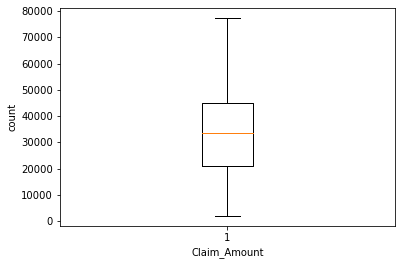

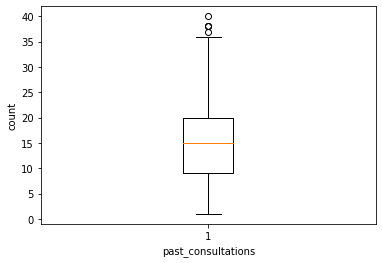

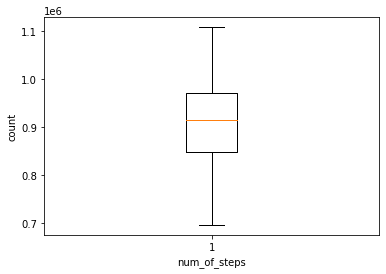

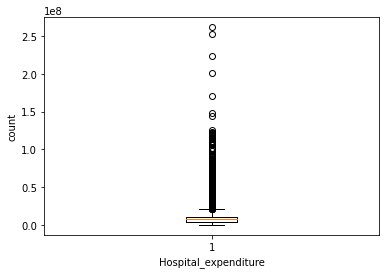

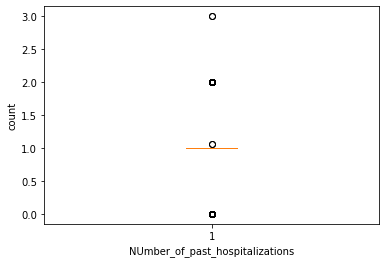

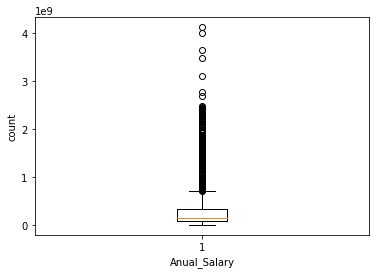

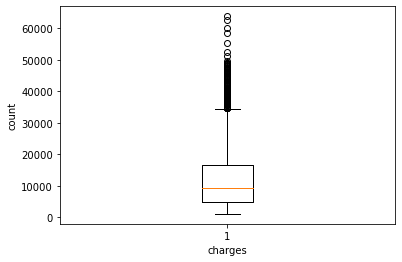

In [14]:
for col_name in col:
    if (insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
        plt.boxplot(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [15]:
insurance.shape

(1338, 13)

In [16]:
Q1=insurance.bmi.quantile(0.25)
Q3=insurance.bmi.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[(insurance.bmi >=Q1-1.5*IQR) & (insurance.bmi <=Q3+1.5*IQR)]

In [17]:
Q1=insurance.past_consultations.quantile(0.25)
Q3=insurance.past_consultations.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[(insurance.past_consultations >=Q1-1.5*IQR) & (insurance.past_consultations <=Q3+1.5*IQR)]

In [18]:
Q1=insurance.Hospital_expenditure.quantile(0.25)
Q3=insurance.Hospital_expenditure.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[(insurance.Hospital_expenditure >=Q1-1.5*IQR) & (insurance.Hospital_expenditure <=Q3+1.5*IQR)]

In [19]:
Q1=insurance.past_consultations.quantile(0.25)
Q3=insurance.past_consultations.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[(insurance.past_consultations >=Q1-1.5*IQR) & (insurance.past_consultations <=Q3+1.5*IQR)]

In [20]:
Q1=insurance.Anual_Salary.quantile(0.25)
Q3=insurance.Anual_Salary.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[(insurance.Anual_Salary >=Q1-1.5*IQR) & (insurance.Anual_Salary <=Q3+1.5*IQR)]

In [21]:
insurance.shape

(1030, 13)

In [22]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


# 3. Multicolinerity

In [23]:
insurance.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840,0.138470
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.138470,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in insurance.columns:
    if ((insurance[col].dtypes!='object') & (col!='charges')):
        col_list.append(col)

In [31]:

col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [38]:
X=insurance[col_list]
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [39]:
for i in range(len(X.columns)):
    print(i)

0
1
2
3
4
5
6
7
8


In [40]:
X.columns

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary'],
      dtype='object')

In [41]:
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)


                           feature        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [42]:
insurance = insurance.drop(['num_of_steps'], axis = 1)


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)
        
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)   



                           feature        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [44]:
insurance = insurance.drop(['age'], axis = 1)


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)
        
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data) 


                           feature        VIF
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [46]:
insurance = insurance.drop(['bmi'], axis = 1)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)
        
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data) 

                           feature       VIF
0                         children  1.977037
1                     Claim_Amount  4.547332
2               past_consultations  5.049165
3             Hospital_expenditure  4.492630
4  NUmber_of_past_hospitalizations  7.245972
5                     Anual_Salary  4.688833


In [48]:
insurance = insurance.drop(['NUmber_of_past_hospitalizations'], axis = 1)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)
        
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data) 

                feature       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


# Machine Learning Algorithms Part

In [50]:
insurance

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
0,male,0.0,no,29087.54313,17.0,4.720921e+06,5.578497e+07,southeast,1121.87390
1,male,0.0,no,39053.67437,7.0,4.329832e+06,1.370089e+07,southeast,1131.50660
2,male,0.0,no,39023.62759,19.0,6.884861e+06,7.352311e+07,southeast,1135.94070
3,male,0.0,no,28185.39332,11.0,4.274774e+06,7.581968e+07,southeast,1136.39940
4,male,0.0,no,14697.85941,16.0,3.787294e+06,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...
1046,female,1.0,yes,51168.25474,23.0,1.665982e+07,3.712188e+08,southeast,19107.77960
1048,male,3.0,yes,46619.40230,27.0,1.361938e+07,3.812895e+08,southwest,19199.94400
1050,male,0.0,yes,24382.58056,21.0,1.028991e+07,3.745310e+08,southeast,19350.36890
1062,female,2.0,yes,21596.43846,10.0,1.083030e+07,3.696849e+08,northeast,19798.05455


In [51]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   1030 non-null   object 
 1   children              1030 non-null   float64
 2   smoker                1030 non-null   object 
 3   Claim_Amount          1030 non-null   float64
 4   past_consultations    1030 non-null   float64
 5   Hospital_expenditure  1030 non-null   float64
 6   Anual_Salary          1030 non-null   float64
 7   region                1030 non-null   object 
 8   charges               1030 non-null   float64
dtypes: float64(6), object(3)
memory usage: 80.5+ KB


In [52]:
x = insurance.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]

x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,3.696849e+08


In [55]:
y=insurance.iloc[:,-1]
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1030, dtype: float64

In [56]:
from sklearn.linear_model import LinearRegression


In [57]:
from sklearn.model_selection import train_test_split


In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state = 0)

In [82]:
# creation of virtual model
model1 = LinearRegression() 


In [83]:
model1.fit(x_train,y_train)


LinearRegression()

In [84]:
y_pred = model1.predict(x_test)


In [85]:
y_pred

array([ 7410.79368293, 10525.46032915,  4225.68186835, 11784.67064225,
        9710.44769938,  2920.2842248 ,  7675.02920953,  3974.05235592,
        1998.90729712,  1644.33779822,  9355.99422159,  6212.23827286,
        7039.69058406,  6913.41064621,  7297.05052731,  8116.21854338,
        5359.21098612, 11610.94654974, 10731.85265303,  4125.9853505 ,
        4978.27582414,  7076.11959566,  5297.22536169, 10517.54532016,
        7970.32302537,  9134.27913297,  3195.07752332,  2030.84851756,
        7974.53183191,  6784.21935489,  9063.13892274,  9603.83277346,
        7310.54589067,  3127.05229652, 10815.26325584,  6390.86195988,
        2959.6122486 ,  5861.07915275,  8191.78215091,  3550.84253839,
        2770.66188065,  7533.68996881,  9234.00165878,  4599.21923178,
        7080.4581291 ,  6040.26489712,  9148.59452642,  9621.34374208,
        1845.77904492,  4786.94915214, 10787.39907084, 10725.71531506,
       10417.07991618,  4695.22528892,  7214.06291724,  4625.56717868,
      

In [86]:
y_test

752    10704.47000
723    10197.77220
177     2801.25880
834    11848.14100
718    10107.22060
          ...     
627     8688.85885
993    16085.12750
426     5976.83110
895    12925.88600
251     3766.88380
Name: charges, Length: 206, dtype: float64

In [87]:
from sklearn.metrics import r2_score # checks the accurancy of the model we created

In [88]:
r2_score(y_test,y_pred)

0.8436003409637124